<a href="https://colab.research.google.com/github/Beh-noush/General-Python/blob/main/%23%20MLE_for_normal_distribution.ipynb(from%20IFT6269)%20ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLE_for_normal_distribution.ipynb(from IFT6269) 

We are going to numerically explore the MLE of the variance parameter of the Gaussian.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sample_gaussian_data(num_samples, num_trials):
  """
  inputs: 
     num_samples: [int] number of samples to generate for each trial
     num_trials: [int] number of trials
  Returns:
     samples: [num_samples,num_trial] Array of generated samples.
  """
  return np.random.randn(num_samples, num_trials)

In [4]:
def mu_sigma2_mle(samples):
    """
    # TODO 
    Compute Gaussian MLE estimators for the mean and variance 
        Inputs:
             samples: [num_samples, num_trials] Matrix of N(0, 1) iid samples. 
                      It contains num_trials sets, each of these sets containing
                      num_samples samples.
        
        Returns:
             mu_hat: [num_trials] Vector of MLE mean estimators for each trial
             sigma2_hat: [num_trials] Vector of MLE variance estimators for each trial
             
    """
    mean = np.mean(samples , axis = 0)
    var = np.mean( (samples - mean)**2, axis = 0 ) #It is equivalent to using np.var(samples , axis = 0)
    return mean , var 

In [6]:
samp = sample_gaussian_data(10,3)
mu_sigma2_mle(samp)

(array([-0.13836067,  0.44849168, -0.29944406]),
 array([0.50100184, 0.27039961, 1.34849992]))

In [8]:
np.var(samp, axis = 0)

array([0.50100184, 0.27039961, 1.34849992])

In [9]:
def freq_mean_var(x):
    """
    Compute the frequentist mean and variance of a vector of n real numbers 
        Inputs:
             x: [n] Vector of real numbers
        
        Returns:
             (mean, var): [tuple] Frequentist mean and variance of x
             
    """
    mean = np.mean(x)
    var = np.mean((x - mean)**2) #Equivalent to np.var(x)
    return (mean , var)


In [10]:
freq_mean_var(samp[:,1])

(0.4484916766760138, 0.27039960644684347)

In [11]:
np.var(samp[:,1])

0.27039960644684347

In [12]:
def empirical_frequentist_bias(empirical_mean, true_mean):
    """
    # TODO 
    Estimate the frequentist bias of an estimator given its empirical and true means 
        Inputs:
             true_mean: [float] True mean of the estimator
             empirical_mean: [float] Empirical mean of the estimator
             
        Returns:
             bias: [float] Frequentist bias
            
    """
    return true_mean - empirical_mean


In [13]:
def plot_sigma_hat_histogram(samples, bins=200):
    """
    Plots a histogram of estimated variances 
        Inputs:
            samples: [array] Estimated variances to be plotted

    """
    plt.xlabel('variance')
    plt.ylabel('counts')
    plt.hist(samples, bins )

In [ ]:
#draw  𝑛=5  samples from the standard Gaussian distribution,  N(0,1) .
samples = sample_gaussian_data(5,1)
print(f'Generated Gaussian samples\n{samples}')

Generated Gaussian samples
[[-1.18890842]
 [ 0.62134348]
 [ 0.42917227]
 [-0.98416142]
 [ 0.2704691 ]]


In [ ]:
#Compute the ML estimate  𝜇̂  for the mean and  𝜎̂2  for the variance of the Gaussian, as given in Question 3(d).
mean , variance = mu_sigma2_mle(samples)
print(f'MLE of mean is {mean}\nMLE of variance is {variance}') 

MLE of mean is [-0.170417]
MLE of variance is [0.57605545]


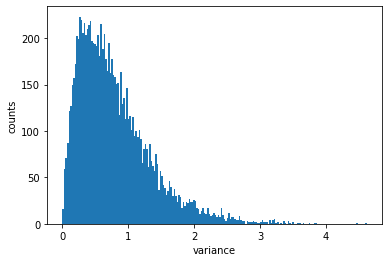

In [17]:
#Repeat the previous steps 10,000 times. Plot a histogram of the 10,000 estimates of the Gaussian variance parameter to show its empirical distribution.
samples  =  sample_gaussian_data(num_samples = 5 , num_trials = 10000)
mean , var = mu_sigma2_mle(samples)
plot_sigma_hat_histogram(var, bins = 200)

We notice that the shape of this histogram shows the Chi-square distribution as we expected for the sum of squares of standard normal variables.


In [ ]:
_, sigma2_hat_vec = mu_sigma2_mle(samples)

0.19962312114292557

In [ ]:
var_of_gaussian_variance = np.mean((var - np.mean(var))**2)
var_of_gaussian_variance 

0.31670181055821495


 Let $X_{1},\dots,X_{n} \stackrel{\text{iid}}{\sim} \mathcal{N}(\mu,\sigma^2)$ (where $\mu \in \mathbb{R}$) for $n\geq2$ to simplify. Let $\bar{X} := \frac{1}{n} \sum_{i=1}^n X_i$. We can show that the MLE for $\theta := (\mu,\sigma^2)$ is  $\hat{\mu} = \bar{X}$ and $\hat{\sigma}^2 := \frac{1}{n} \sum_{i=1}^n (X_i - \bar{X})^2$. Here, we want to derive the bias, variance and consistency  only for $\hat{\sigma}^2$.


 When calculating the variance of $\hat{\sigma}^2$, we use the fact that $\frac{1}{\sigma^2} \sum_{i=1}^n (X_i - \bar{X})^2 \stackrel{\text{d}}{=} \chi_{n-1}^2$, where $\chi_{n-1}^2$ be the chi-squared distribution with $(n-1)$ degrees of freedom. Also, for chi-squared distribution, we have $\text{Var} [\chi_{n-1}^2] = 2(n-1)$.

Next, we find the expectation of $\hat{\sigma^2}$ to see if it is biased.
$$
 \mathbb{E}[ \hat{\sigma^2}] = \frac{\sum_{i=1}^n\mathbb{E}[(X_i-\bar X)^2] }n = \frac1n \sigma^2 \mathbb{E}[\sum_{i=1}^n (\frac{X_i-\bar X}{\sigma})^2]
$$
We notice that if $X_i$ have normal distribution with variance $\sigma^2$, the new variables $\frac{X_i-\bar X}{\sigma}$ have standard distribution and therefore the sum of their squared values has Chi-distribution $\chi_{n-1}$. The expectation value of Chi-distribution is $(n-1)$ which means the mean of 
$$\mathbb E[ \hat{\sigma^2}]  = \frac1n \sigma^2\mathbb E[\sum_{i=1}^n (\frac{X_i-\bar X}{\sigma})^2] = \frac1n \sigma^2(n-1) =  \sigma^2(1-\frac1n) =\sigma^2-\frac{\sigma^2}n$$
Therefore, the estimator of variance is biased and its bias is equal to 
$$
bias(\hat{\sigma^2}) = \sigma^2  - \mathbb E[\hat{\sigma^2}] = \frac{\sigma^2}n \neq 0 \,\,\to \hat{\sigma^2}\text{ is biased}
$$

Finally its variance is
$$Var[ \hat{\sigma^2}] = Var[\frac{\sum_{i=1}^n (X_i-\bar X)^2 }n] = Var[\sigma^2\frac{\sum_{i=1}^n (\frac{X_i-\bar X}{\sigma})^2 }n] 
=\frac{\sigma^4}{n^2} Var[\sum_{i=1}^n (\frac{X_i-\bar X}{\sigma})^2  ]$$

With the same line of argument as for the case of the expectation value of $\hat{\sigma^2}$, we use the properties of the Chi-square distribution which has $2(n-1)$ as the variance for $\chi_{n-1}$. Therefore, the above value of variance becomes
$$Var[ \hat{\sigma^2}] = Var[\frac{\sum_{i=1}^n (X_i-\bar X)^2 }n] =\frac{\sigma^4}{n^2} (2(n-1))  =\frac{2(n-1)}{n^2}  \sigma^4 
$$

We can compare these theoretical results for the bias and variance of the estimator $\hat\sigma^2$ with the theoretical result:

In [20]:
NUM_SAMPLES = 5
bias_of_gaussian_variance = np.mean(var) - 1

# Use the same 10,000 repeated trials to numerically estimate the (frequentist) bias and variance of the ML estimate  𝜎̂2  of the Gaussian variance parameter.
# Compare the results with the theoretical (frequentist) bias and variance that you can compute above.
sigma2_hat_mean, sigma2_hat_var = freq_mean_var(var)

TRUE_SIGMA2 = 1.

# The theoretical bias and variance of $\hat{\sigma}^2$
n = NUM_SAMPLES
THEO_BIAS = TRUE_SIGMA2/n
THEO_VAR =  TRUE_SIGMA2**2*(2*n -2)/(n**2)

emp_bias = empirical_frequentist_bias(empirical_mean=sigma2_hat_mean,
                                      true_mean=TRUE_SIGMA2)

print('Theoretical Bias: ', THEO_BIAS, ' Freq. Estimated Bias: ', emp_bias)
print('Theoretical Variance: ', THEO_VAR, ' Freq. Estimated Variance: ', sigma2_hat_var)

Theoretical Bias:  0.2  Freq. Estimated Bias:  0.20402697452170704
Theoretical Variance:  0.32  Freq. Estimated Variance:  0.3112150654280202


Conclusions drawn from this experiment:
The numerical result is pretty close to the theoretical one for the num_trials as large as 10000. 